# Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy import stats



# Import Dataset

In [3]:
credit_data=pd.read_csv('/content/drive/MyDrive/CODSOFT/creditcard.csv')

# Data Infromation

In [4]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85254,60679,1.258467,0.407363,0.160962,1.034153,0.175374,-0.344634,0.227623,-0.227186,-0.203630,...,-0.081358,-0.162500,-0.154661,-0.429501,0.697308,-0.377775,0.027767,0.023488,20.00,0.0
85255,60680,1.170321,-0.791258,0.341092,-0.498724,-1.234283,-1.024154,-0.282613,-0.248967,-0.867952,...,-0.577634,-1.495287,0.148887,0.380317,-0.089069,0.725803,-0.077233,0.033769,120.99,0.0
85256,60681,0.826449,-0.246364,-0.220287,1.144915,0.119542,0.013537,0.454082,-0.030595,-0.481902,...,0.142593,0.029994,-0.281769,-0.287336,0.598513,-0.330393,-0.020391,0.033028,192.00,0.0
85257,60682,1.201303,-0.309688,-0.314367,0.167426,1.540306,4.059730,-1.136824,1.090075,0.760974,...,-0.113604,-0.280918,-0.043147,1.001217,0.572592,-0.393931,0.074081,0.032089,12.99,0.0
85258,60684,-1.035410,1.278230,1.652904,0.574609,-0.222304,0.410386,-0.100852,0.859145,-0.699598,...,-0.104574,-0.408998,-0.128501,-0.383566,0.099796,-0.432130,NaN,NaN,NaN,NaN


In [6]:
credit_data.shape

(85259, 31)

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85259 entries, 0 to 85258
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85259 non-null  int64  
 1   V1      85259 non-null  float64
 2   V2      85259 non-null  float64
 3   V3      85259 non-null  float64
 4   V4      85259 non-null  float64
 5   V5      85259 non-null  float64
 6   V6      85259 non-null  float64
 7   V7      85259 non-null  float64
 8   V8      85259 non-null  float64
 9   V9      85259 non-null  float64
 10  V10     85259 non-null  float64
 11  V11     85259 non-null  float64
 12  V12     85259 non-null  float64
 13  V13     85259 non-null  float64
 14  V14     85259 non-null  float64
 15  V15     85259 non-null  float64
 16  V16     85259 non-null  float64
 17  V17     85259 non-null  float64
 18  V18     85259 non-null  float64
 19  V19     85259 non-null  float64
 20  V20     85259 non-null  float64
 21  V21     85259 non-null  float64
 22

In [8]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,...,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85258.000000,85258.000000,85258.000000,85258.000000
mean,38698.541691,-0.262585,-0.039207,0.679054,0.163611,-0.277616,0.094861,-0.111651,0.054145,-0.021205,...,-0.029273,-0.105613,-0.037762,0.008986,0.133598,0.026270,0.001449,0.001934,98.374057,0.002393
std,15668.300002,1.878484,1.670189,1.366683,1.363280,1.375170,1.303646,1.237707,1.223035,1.135023,...,0.731860,0.635127,0.626519,0.595040,0.441017,0.497236,0.389486,0.328312,268.381509,0.048857
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31595.000000,-1.025883,-0.602941,0.184642,-0.722311,-0.896999,-0.644375,-0.603378,-0.140721,-0.690902,...,-0.223696,-0.524879,-0.178156,-0.322420,-0.130610,-0.326403,-0.063467,-0.005899,7.680000,0.000000
50%,41180.000000,-0.258057,0.069615,0.762733,0.186825,-0.311837,-0.155047,-0.072501,0.070103,-0.097017,...,-0.057764,-0.080822,-0.049921,0.064547,0.171852,-0.072601,0.009302,0.022947,26.990000,0.000000
75%,50942.000000,1.153099,0.724933,1.390659,1.042062,0.257707,0.488674,0.416990,0.352738,0.602616,...,0.118290,0.309640,0.080706,0.405794,0.421184,0.306305,0.082480,0.076063,89.900000,0.000000
max,60684.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


# Check Null Value

In [9]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

# Data Visualization

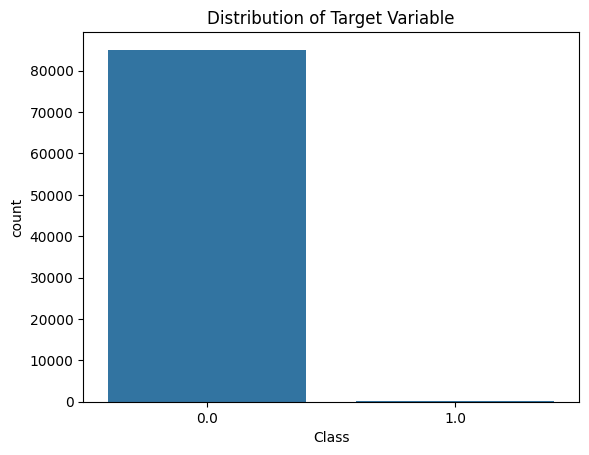

In [10]:
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Target Variable')
plt.show()


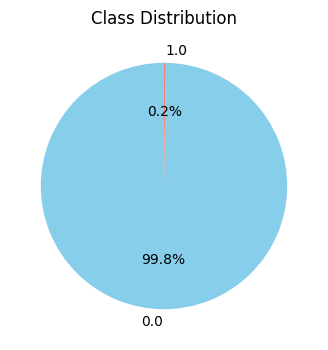

In [12]:
plt.figure(figsize=(4, 4))
credit_data['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


<ipython-input-13-71750805a5fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=credit_data, palette=['skyblue', 'salmon'])


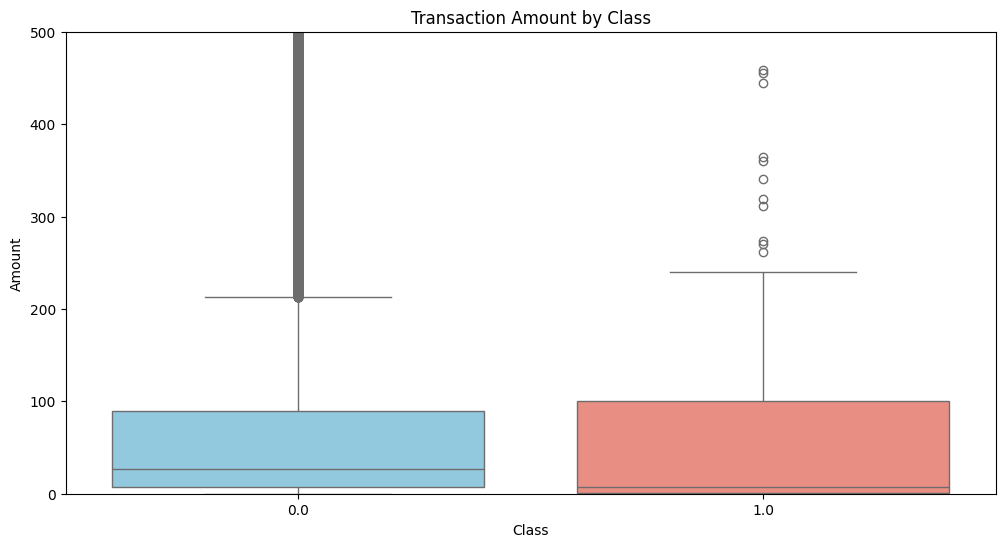

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=credit_data, palette=['skyblue', 'salmon'])
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.ylim(0, 500)
plt.show()



# Data Preprocessing

In [14]:
credit_data["Class"].value_counts()

Class
0.0    85054
1.0      204
Name: count, dtype: int64

In [15]:
Nofraud=credit_data[credit_data.Class==0]
Fraud=credit_data[credit_data.Class==1]

In [16]:
Nofraud.shape


(85054, 31)

In [17]:
Fraud.shape

(204, 31)

In [18]:
Nofraud.Amount.describe()

count    85054.000000
mean        98.365392
std        268.470093
min          0.000000
25%          7.690000
50%         27.000000
75%         89.800000
max      19656.530000
Name: Amount, dtype: float64

In [19]:
Fraud.Amount.describe()

count     204.000000
mean      101.986814
std       229.008970
min         0.000000
25%         1.000000
50%         7.550000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [20]:
credit_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,38709.224046,-0.247847,-0.049900,0.70098,0.151762,-0.267214,0.099795,-0.095774,0.047207,-0.013915,...,0.041531,-0.031152,-0.105502,-0.037276,0.009236,0.133378,0.026126,0.000087,0.001840,98.365392
1.0,34136.960784,-6.403734,4.412429,-8.46741,5.101621,-4.614515,-1.964040,-6.731357,2.942715,-3.057064,...,0.391757,0.754409,-0.150411,-0.240026,-0.093307,0.225443,0.088375,0.569295,0.040876,101.986814


In [21]:
Nofraud_sample=Nofraud.sample(n=492)

In [22]:
credit_data_new=pd.concat([Nofraud_sample,Fraud],axis=0)

In [23]:
credit_data_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56126,47281,-0.962636,0.973510,-0.326369,-1.001641,2.058689,3.636360,-0.226124,1.376675,-0.284217,...,-0.183238,-0.598729,-0.134355,1.026179,0.151318,0.244403,0.066150,0.096389,16.58,0.0
69506,53452,1.225843,-0.048475,-0.081174,-0.076972,-0.281542,-0.838487,0.146744,-0.074474,-0.086404,...,-0.413725,-1.413624,0.148802,-0.027642,0.053900,0.627440,-0.120012,-0.008156,34.99,0.0
11616,19912,1.375755,-0.597776,0.596852,-0.223441,-1.199637,-0.809787,-0.751192,-0.150444,1.109439,...,-0.186229,-0.305837,-0.008387,0.316008,0.470636,-0.278448,-0.026409,0.004866,20.00,0.0
14720,25947,1.248133,-0.493959,-0.505725,-0.787706,-0.320326,-0.568781,-0.197038,-0.115430,-1.257438,...,-0.283683,-1.217142,-0.000268,-0.625650,0.242620,-0.618277,-0.019274,0.037928,104.70,0.0
69388,53401,-0.419158,1.049372,0.553746,0.083017,-0.250826,-0.921592,0.550986,0.300857,-1.005973,...,0.168132,0.286838,0.044752,0.561390,-0.246811,0.229925,-0.135033,-0.040628,33.00,0.0


In [24]:
credit_data_new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82400,59385,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.98,1.0
83053,59669,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1.0
83297,59777,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1.0
83417,59840,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1.0
84543,60353,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1.0


In [25]:
credit_data_new["Class"].value_counts()

Class
0.0    492
1.0    204
Name: count, dtype: int64

In [26]:
credit_data_new.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,38764.524390,-0.077871,-0.004340,0.622743,0.191754,-0.295732,0.036597,-0.116709,0.075079,-0.135157,...,0.038122,-0.046315,-0.098207,-0.027360,0.043883,0.120685,0.021371,-0.008049,-0.001639,85.785650
1.0,34136.960784,-6.403734,4.412429,-8.467410,5.101621,-4.614515,-1.964040,-6.731357,2.942715,-3.057064,...,0.391757,0.754409,-0.150411,-0.240026,-0.093307,0.225443,0.088375,0.569295,0.040876,101.986814


In [27]:
features=credit_data_new.drop(columns="Class",axis=1)
target=credit_data_new["Class"]

# Spliting data Into testing and tarining sets

In [28]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2,stratify=target, random_state=2)


# Model Training

In [30]:
model=LogisticRegression()
model.fit(features_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Accuracy

In [31]:
feature_train_predict=model.predict(features_train)
train_data_accuracy=accuracy_score(feature_train_predict,target_train)

In [32]:
print("Accuracy on training Data:",train_data_accuracy*100)

Accuracy on training Data: 96.0431654676259


In [33]:
feature_test_predict=model.predict(features_test)
test_data_accuracy=accuracy_score(feature_test_predict,target_test)

In [34]:
print("Accuracy on testing Data:",test_data_accuracy*100)

Accuracy on testing Data: 94.28571428571428
